In [81]:
import mplhep as hep
import matplotlib.pyplot as plt
from wremnants.datasets.datagroups import datagroups2016
from wremnants import boostHistHelpers as hh
from wremnants import plot_tools,syst_tools,theory_tools
from wremnants import histselections as sel
import lz4.frame
import pickle
import numpy as np
import hist
import uproot

In [2]:
%load_ext autoreload
%autoreload 2

In [6]:
with lz4.frame.open("../w_z_gen_dists.pkl.lz4") as f:
    out = pickle.load(f)

Here
55071326.27459677 55071326.27459677
Here
55567360.33248611 55071326.27459677
Here
54575292.2167074 55071326.27459677


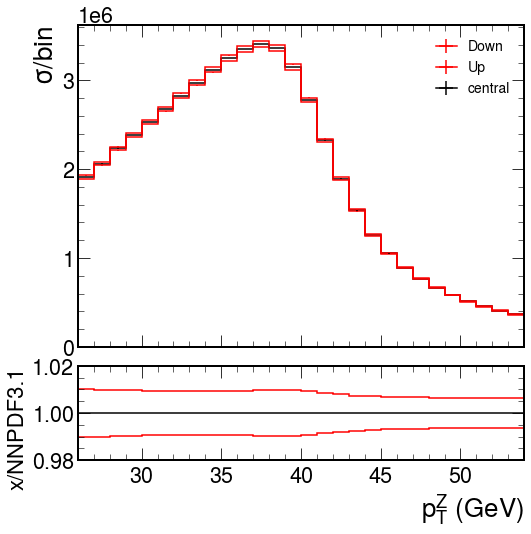

In [175]:
fig = plot_tools.makePlotWithRatioToRef(hists, colors=["black", "red", "red"], labels=["central", "Up", "Down"], rrange=[0.98, 1.02], ylabel="$\sigma$/bin", xlabel="p$_{T}^{\mathrm{Z}}$ (GeV)", rlabel="x/NNPDF3.1", binwnorm=1.0, nlegcols=1)


In [101]:
hct18 = histInfo["Wmunu"]["pdfCT18"]
hct18Up, hct18Down = theory_tools.hessianPdfUnc(hct18, "tensor_axis_0", False, scale=1/1.67)

In [103]:
hmmht = histInfo["Wmunu"]["pdfMMHT"]
hmmhtUp, hmmhtDown = theory_tools.hessianPdfUnc(hmmht, "tensor_axis_0", False)

In [99]:
hists = [x.project("ptVgen") for x in [hnnpdf[...,0], hnnpdfUp, hnnpdfDown, hct18[...,0], hct18Up, hct18Down, hmmht[...,0], hmmhtUp, hmmhtDown]]
names = ["NNPDF31", "NNPDF31 $\pm1\sigma$", "", "CT18", "CT18 $\pm1\sigma$", "", "MMHT", "MMHT $\pm1\sigma$", ""]
colors = ["black", "gray", "gray", "blue", "lightblue", "lightblue", "green", "lightgreen", "lightgreen"]

In [161]:
hnnpdf40 = newhists["pdfNNPDF40"]
hnnpdf40Cen = hnnpdf40[...,0]
hnnpdf31Cen = hnnpdf[...,0]
hnnpdf40Up, hnnpdf40Down = theory_tools.hessianPdfUnc(hnnpdf40, "tensor_axis_0", True)

In [164]:
hnnpdf4lhc = newhists["pdfPDF4LHC21"]
hnnpdf4lhcCen = hnnpdf4lhc[...,0]
hnnpdf4lhcUp, hnnpdf4lhcDown = theory_tools.hessianPdfUnc(hnnpdf4lhc, "tensor_axis_0", True)

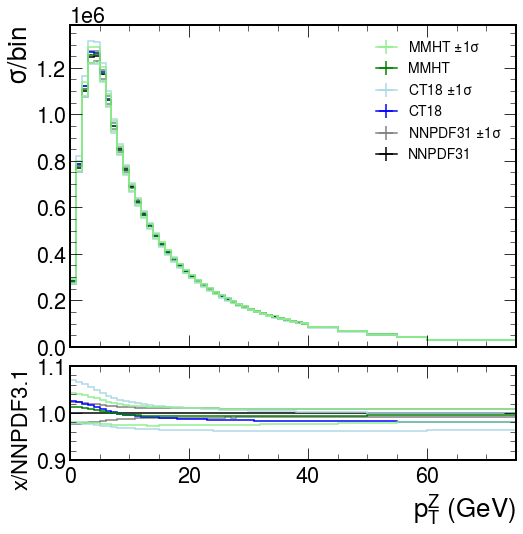

In [100]:
fig = plot_tools.makePlotWithRatioToRef(hists, colors=colors, labels=names, rrange=[0.9, 1.1], ylabel="$\sigma$/bin", xlabel="p$_{T}^{\mathrm{Z}}$ (GeV)", rlabel="x/NNPDF3.1", binwnorm=1.0, nlegcols=1)

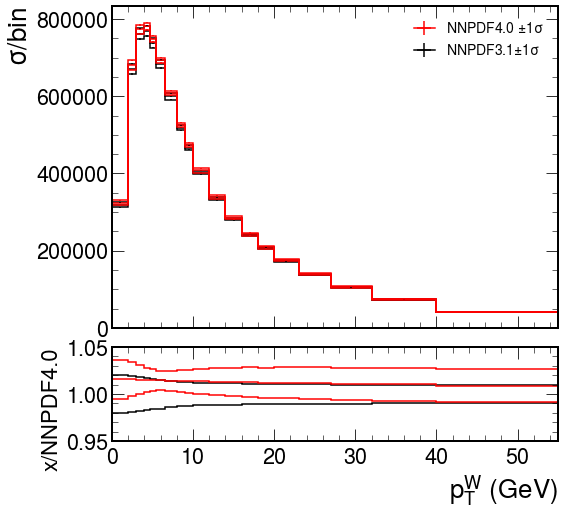

In [150]:
hists = [x.project("ptVgen") for x in [hnnpdf31Cen, hnnpdfUp, hnnpdfDown, hnnpdf40Cen, hnnpdf40Up, hnnpdf40Down, ]]
names = ["NNPDF3.1$\pm1\sigma$", "", "", "NNPDF4.0 $\pm1\sigma$", "", "", ]
colors = ["black", "black", "black", "red", "red", "red"]
fig = plot_tools.makePlotWithRatioToRef(hists, colors=colors, labels=names, rrange=[0.95, 1.05], ylabel="$\sigma$/bin", xlabel="p$_{T}^{\mathrm{W}}$ (GeV)", rlabel="x/NNPDF4.0", binwnorm=1.0, nlegcols=1)

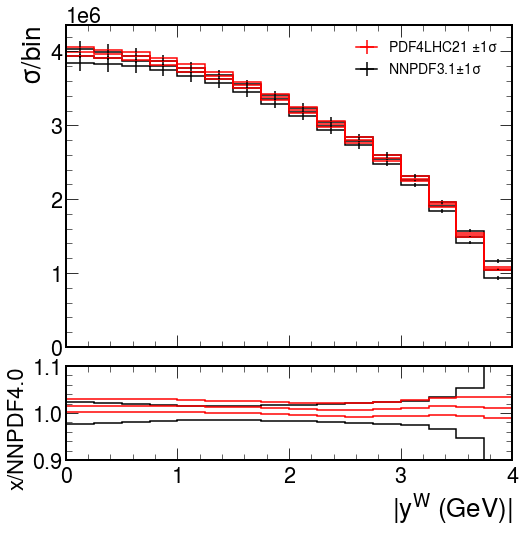

In [165]:
yhists = [x.project("absYVgen") for x in [hnnpdf31Cen, hnnpdfUp, hnnpdfDown, hnnpdf40Cen, hnnpdf40Up, hnnpdf40Down, ]]
fig = plot_tools.makePlotWithRatioToRef(yhists, colors=colors, labels=names, rrange=[0.9, 1.1], ylabel="$\sigma$/bin", xlabel="$|\mathrm{y}^{\mathrm{W}}$ (GeV)|", rlabel="x/NNPDF4.0", binwnorm=1.0, nlegcols=1)


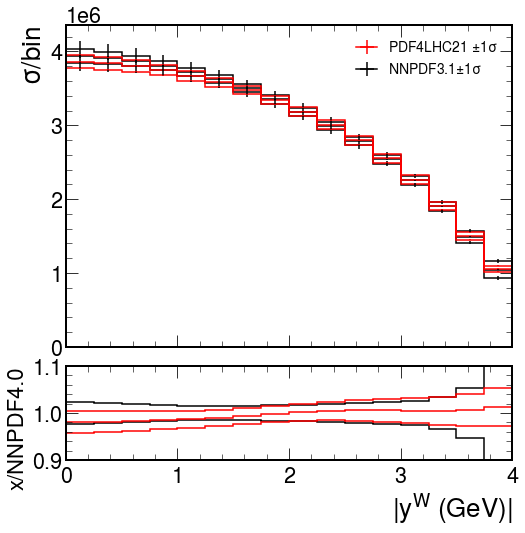

In [166]:
names = ["NNPDF3.1$\pm1\sigma$", "", "", "PDF4LHC21 $\pm1\sigma$", "", "", ]
colors = ["black", "black", "black", "red", "red", "red"]
yhists = [x.project("absYVgen") for x in [hnnpdf31Cen, hnnpdfUp, hnnpdfDown, hnnpdf4lhcCen, hnnpdf4lhcUp, hnnpdf4lhcDown, ]]
fig = plot_tools.makePlotWithRatioToRef(yhists, colors=colors, labels=names, rrange=[0.9, 1.1], ylabel="$\sigma$/bin", xlabel="$|\mathrm{y}^{\mathrm{W}}$ (GeV)|", rlabel="x/NNPDF4.0", binwnorm=1.0, nlegcols=1)

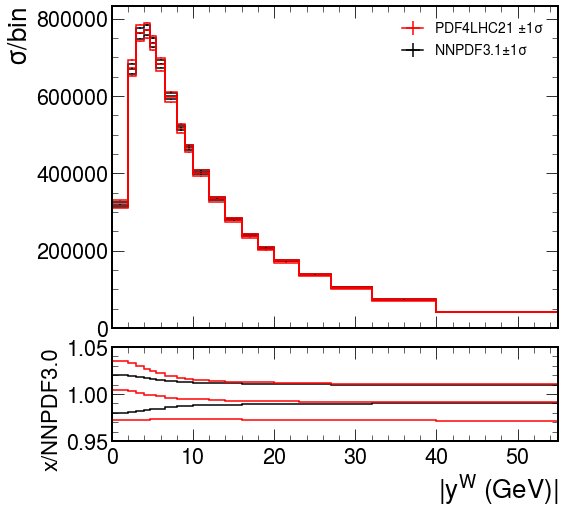

In [156]:
yhists = [x.project("ptVgen") for x in [hnnpdf31Cen, hnnpdfUp, hnnpdfDown, hnnpdf4lhcCen, hnnpdf4lhcUp, hnnpdf4lhcDown, ]]
fig = plot_tools.makePlotWithRatioToRef(yhists, colors=colors, labels=names, rrange=[0.95, 1.05], ylabel="$\sigma$/bin", xlabel="$|\mathrm{y}^{\mathrm{W}}$ (GeV)|", rlabel="x/NNPDF3.0", binwnorm=1.0, nlegcols=1)
